In [1]:
"""
Facial Regonition Program with Olivetti Dataset
Name: Mitsuka Kiyohara
Date: 4/21/22 
Block: B 

"""

''' Import Libraries '''
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

In [18]:
''' Load Data '''
data = np.load("olivetti_faces.npy")
target_labels = np.load("olivetti_faces_target.npy") 

# print("data.shape = " + str(data.shape))
# print("target_labels.shape = " + str(target_labels.shape))

data.shape = (400, 64, 64)
target_labels.shape = (400,)


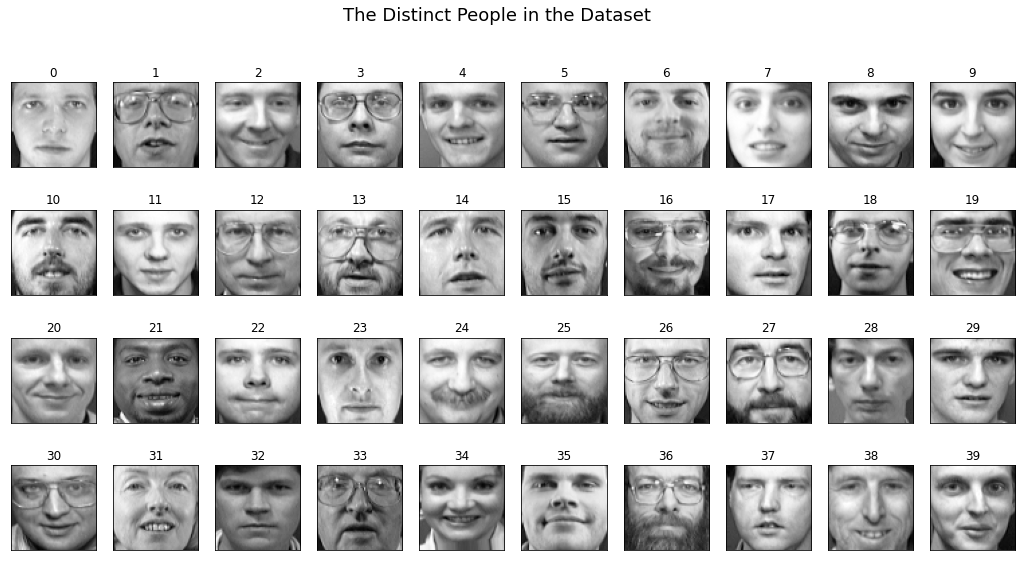

In [19]:
''' Exploring the Face Database '''
# Just to visualize all the unique faces 
def plot_people(data, labels): 
    num_people = 40 
    num_per_category = 10
    fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(18,9))
    axs = axs.flatten() 
    for p in range(0, num_people):
        I = p * num_per_category 
        pid = labels[I] 
        axs[pid].imshow(data[I], cmap = 'gray')
        axs[pid].set_title("%d"%pid)
        axs[pid].set_xticks([])
        axs[pid].set_yticks([])
    plt.suptitle("The Distinct People in the Dataset", fontsize=18) 

plot_people(data, target_labels)

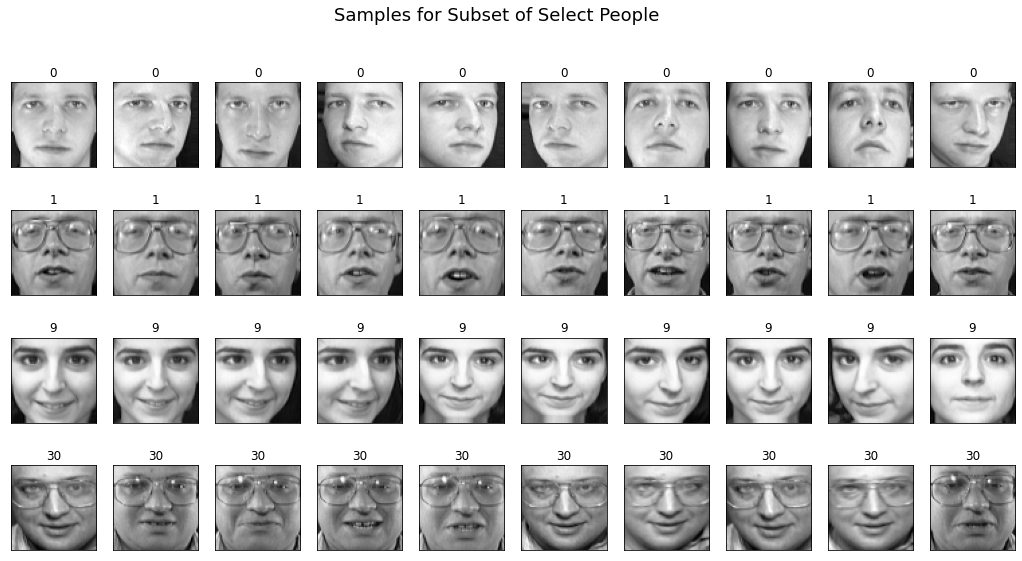

In [15]:
def plot_people_samples(data, pids):
    num_samples = 10
    cols = num_samples # number of samples of the category 
    #rows = (len(pids)*numSamples)/cols
    #rows = int(rows)
    rows = len(pids)
    
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
                            
    i = 0
    for pid in pids:
        #print("pid = %d"%pid)
        for j in range(0,num_samples):
            I = pid * num_samples + j
            #print("i,j = (%d,%d)"%(i,j))
            axs[i,j].imshow(data[I], cmap="gray")
            axs[i,j].set_title("%d"%pid)
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        i = i + 1
    
    plt.suptitle("Samples for Subset of Select People", fontsize=18)

plot_people_samples(data,[0,1,9,30])

In [20]:
''' Performing PCA 
PCA is a technique for feature extraction, where it combines input variables and drops "least important" variables. 
Gurantees that all the "new" variables are independent of each other. 
'''
# Credit: Paul J. Atzberger 

# Create a "design matrix" for the sample 
num_samples = data.shape[0]
image_size = data.shape[1] * data.shape[2] # 64 by 64
X = data.reshape((num_samples, image_size))